In [1]:
import pandas as pd

In [6]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
data = pd.read_csv(url, sep = ';')
data


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [7]:
data.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


In [11]:
for i in data.columns:
    print(i, end= ' / ')

Tipo / Bairro / Quartos / Vagas / Suites / Area / Valor / Condominio / IPTU / 

In [13]:
data.Tipo.unique()

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [25]:
data.shape

(32960, 9)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [22]:
data_md_valores = data.groupby('Bairro')[["Valor"]].mean().sort_values('Valor', ascending=False)
data_md_valores.head(10)

,Valor
Bairro,
Jacarepaguá,314143.489637
Irajá,154610.470588
Caju,120264.782609
Vasco da Gama,120000.000000
Cidade Nova,88166.692308
Cidade de Deus,80000.000000
Gamboa,60940.791667
Pavuna,47442.315789
Santo Cristo,45139.188406


In [33]:
data[["Bairro", "Valor"]]

,Bairro,Valor
0,Copacabana,1700.0
1,Jardim Botânico,7000.0
2,Barra da Tijuca,5200.0
3,Centro,800.0
4,Higienópolis,800.0
...,...,...
32955,Centro,800.0
32956,Jacarepaguá,1800.0
32957,São Francisco Xavier,1400.0
32958,Leblon,3000.0


In [34]:
data["Valor"].mean()

12952.659715265761

<Axes: ylabel='Tipo'>

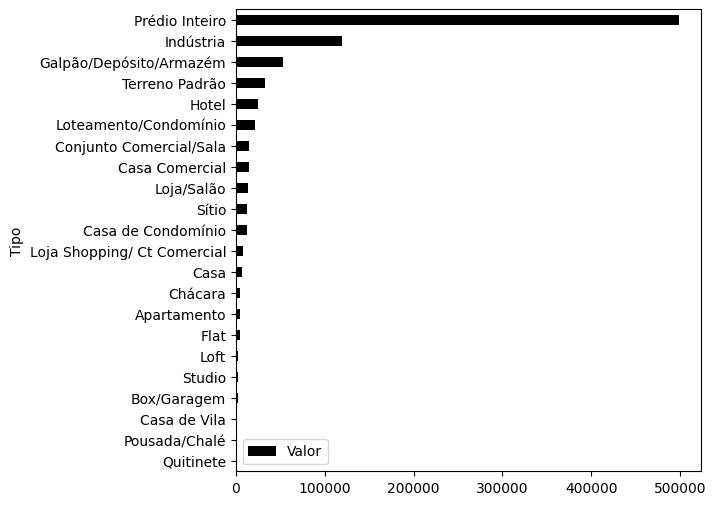

In [39]:
#media de preço por tipo de apartamento
media_preço_tipo = data.groupby("Tipo")[['Valor']].mean().sort_values("Valor")
media_preço_tipo.plot(kind='barh', figsize=(6,6), color = 'black')

In [41]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']
                                            

In [40]:
df_residencial = data.query("@imoveis_comerciais not in tipo")
df_residencial

UndefinedVariableError: local variable 'imoveis_comerciais' is not defined